### Are employers doing enough to address their employee's mental health?
    
    In analyzing mental health trends inside the tech industry, it is important to see whether or not employers are doing enough to address their employees mental health needs. This survey gives us insight into that by asking the following three questions:
    
    1. Do you know the options for mental health care available under your employer-provided health coverage?
    
        Granted employees are responsible for knowing their own benefits that are provided by their healthcare. nonetheless, employers can make sure they are communicating those benefits or at the very least reminding their employees that they have mental health benefits and they should findo ut what they are. 

    2. Does your employer offer resources to learn more about mental health disorders and options for seeking help?

        At this point, every company should be offering resources to help employers with learning and managing their mental health disorders. We expect to see respondents answer yes to this overwhelmingly. 

    3. Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?

        It is important for companies to have a good line of communcation with their employees. Moreover, it is important for them to keep a consistent dialogue open about mental heath. we would hope that mostr respondents answer yes to this question.


    The thought process here is that the more yes responses we have the more we can say that tech companies are doing enough to take care of their employees' mental health and the more no's and I don't knows There are The more these companies need to improve. To analyze this, we'll first look at how many respondents answered yes to these three questions. Second, we'll look at each question individually.

      

    

In [33]:
import pandas as pd 
import matplotlib  as mp


In [34]:
file = 'Data/Survey_Data.csv'

Survey_Data = pd.read_csv(file)

Survey_Data.head()

,UserID,Age,Gender,Country,State/Territory,Do you know the options for mental health care available under your employer-provided health coverage?,Does your employer offer resources to learn more about mental health disorders and options for seeking help?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?"
0,1,37,Female,United States,Illinois,Did Not Answer,Did Not Answer,Did Not Answer
1,2,44,Male,United States,Indiana,Did Not Answer,Did Not Answer,Did Not Answer
2,3,32,Male,Canada,Not Applicable,Did Not Answer,Did Not Answer,Did Not Answer
3,4,31,Male,United Kingdom,Not Applicable,Did Not Answer,Did Not Answer,Did Not Answer
4,5,31,Male,United States,Texas,Did Not Answer,Did Not Answer,Did Not Answer


In [35]:
# Name questions 1 , 2 and 3 for ease of use.

Survey_Data = Survey_Data.rename(columns ={'Do you know the options for mental health care available under your employer-provided health coverage?' : 'Question 1',
                                            'Does your employer offer resources to learn more about mental health disorders and options for seeking help?': 'Question 2',
                                            'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?' : 'Question 3'})

Initially, I was going to include people who didn't answer the question but realized that it would skew the results against employers quite drastically. So I decided to filter them out. This leaves 2,191 respondents in the dataset

In [36]:
# Filter out anyone who didn't answer the questions

Survey_Data = Survey_Data[(Survey_Data['Question 1'] != 'Did Not Answer') & (Survey_Data['Question 2'] != 'Did Not Answer') & (Survey_Data['Question 3'] != 'Did Not Answer') ]

In order to count yes responses per user, I used the .apply() method with a lambda function. All I needed to do was specify the axis to run the lambda function on.

In [37]:
Survey_Data["Yes Responses"] = Survey_Data.apply(lambda x: (x == 'Yes').sum(), axis=1)


Survey_Data

,UserID,Age,Gender,Country,State/Territory,Question 1,Question 2,Question 3,Yes Responses
1261,1262,29,Male,United States,Illinois,Yes,Yes,Yes,3
1264,1265,43,Female,United States,Illinois,Yes,No,No,1
1265,1266,42,Male,United Kingdom,Not Applicable,No,Yes,No,1
1266,1267,30,Male,United States,Tennessee,No,No,No,0
1267,1268,37,Female,United States,Virginia,Yes,Yes,No,2
...,...,...,...,...,...,...,...,...,...
4211,4212,26,Female,Brazil,Not Applicable,No,No,No,0
4212,4213,31,Female,United States,California,No,No,No,0
4213,4214,27,Male,India,Not Applicable,No,I don't know,No,0
4216,4217,30,Female,India,Not Applicable,No,No,No,0


This is just a small dataframe showing how many respondents fell into each group. The index is from 0 to 3 which is how many questions each respondent answered yes to.

In [48]:
yes = Survey_Data["Yes Responses"].value_counts()


Responses = pd.DataFrame({
                "Yes Responses" : yes
})




Responses



,Yes Responses
0,980
1,606
2,332
3,273


These are percentage calulations for each group. Yo ucan see that 45% of people did answer yes to any of the questions, 27.5% of people only answered yes to 1 out of 3 questions, 15% of people answered yes to 2 out of 3 questions and 12.5% answered yes to all three questions

In [40]:
total_respondents = Survey_Data['UserID'].count()

total_respondents

2191

In [42]:
pct_0_questions = round((yes[0] / total_respondents) * 100,2)

pct_0_questions

44.73

In [43]:
pct_1_questions = round((yes[1] / total_respondents) * 100,2)

pct_1_questions

27.66

In [44]:
pct_2_questions = round((yes[2] / total_respondents) * 100,2)

pct_2_questions

15.15

In [45]:
pct_3_questions = round((yes[3] / total_respondents) * 100,2)

pct_3_questions

12.46

<AxesSubplot:title={'center':'How Many Questions Each Respondent Answered Yes To'}, xlabel='Number of Questions', ylabel='Number of Respondents'>

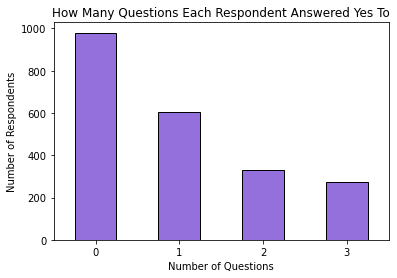

In [47]:
(Responses
    .plot(
    kind='bar',
    xlabel= 'Number of Questions',
    ylabel='Number of Respondents',
    color=['mediumpurple'],
    title='How Many Questions Each Respondent Answered Yes To',
    rot=0,
    edgecolor='black',
    legend=False
    ))



  


The thought process here is that if a respondent answers yes to all three questions then their company is doing a great job and if a respondent does not answer yes to any questions then their employer is doing a poor job of addressing their employee's mental health needs. As you can see, most people either answered yes to one question  out of three (27.5%) or none of the questions (45%). Since that consists of almost three quarters of respondents, we can conclude that employers are not doing enough to address their employee's mental health needs. 



In [10]:
question_1= Survey_Data['Question 1'].value_counts()
question_2 = Survey_Data['Question 2'].value_counts()
question_3 = Survey_Data['Question 3'].value_counts()

questions_df = pd.DataFrame({
    'Question 1': question_1,
    'Question 2': question_2,
    'Question 3': question_3
})

questions_df['Question 1'] = questions_df['Question 1'].fillna(value=0 ).astype('int')

questions_df.sort_index(ascending=False)

,Question 1,Question 2,Question 3
Yes,869,668,552
No,1322,899,1426
I don't know,0,624,213


<AxesSubplot:title={'center':'Do you know the options for mental health care available under your employer-provided health coverage?'}, ylabel='Number of Responses'>

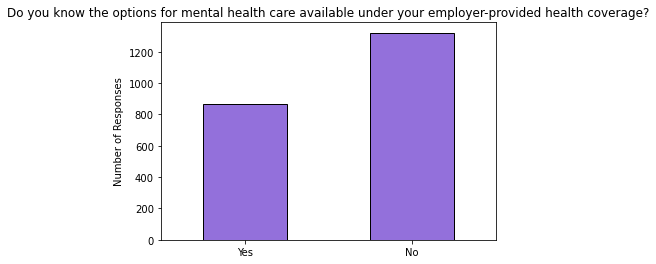

In [11]:
(question_1
        .sort_index(ascending=False)
        .plot(
            kind='bar' , 
            title='Do you know the options for mental health care available under your employer-provided health coverage?' ,
            rot=0,
            color="mediumpurple",
            edgecolor='black',
            ylabel='Number of Responses'))

This graph shows that there are more respondents that do not know their options from their healthcare plan than not. Companies can be doing more to tell their employees what benefits they have or atleast remind them to atleast look at what mental healthcare optiosn are available  to them. Granted employees should know or atleast want to look into all of the benefits that they have under their healthcare plan. Something that could be affecting these responses is whether someone has or think they have a mental issue. They would be more inclined to find out what mental benefits they have under their health plan where as people who do not have mental issues may not be looking. It could be interesting to explore this more separating the respondents by whether they have a mental diagnosis or not.

<AxesSubplot:title={'center':'Does your employer offer resources to learn more about mental health disorders and options for seeking help?'}, ylabel='Number of Responses'>

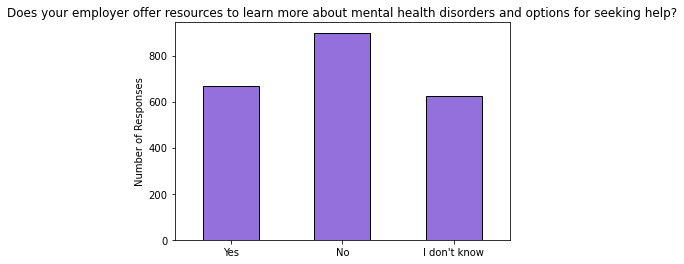

In [12]:
(question_2
        .sort_index(ascending=False)
        .plot(
            kind='bar' , 
            title='Does your employer offer resources to learn more about mental health disorders and options for seeking help?' ,
            rot=0,
            facecolor="mediumpurple",
            edgecolor='black',
            ylabel='Number of Responses'))

Again, the same trend shows that more people answered no than yes although it is much closer (only a gap of 200 to 300). This graph does show two causes for concern. First, there are tech companies that are not offering resources to learn about mental health or options for seeking help. Second, a lot of respondents answered 'I don't know'. If companies are providing these resources then it is possible they are not doing a good enough job communicating with their employees about them. It could be smart to break this out by comnpany size. Larger companies may have more resources available to their employees where as small and medium sized companies may not provide as many resources to their employees

<AxesSubplot:title={'center':'Has your employer ever formally discussed mental health?'}, ylabel='Number of Responses'>

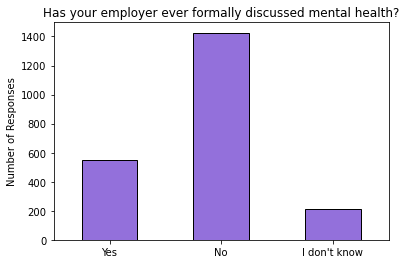

In [13]:
(question_3
        .sort_index(ascending=False)
        .plot(
            kind='bar' , 
            title='Has your employer ever formally discussed mental health?' ,
            rot=0,
            facecolor="mediumpurple",
            edgecolor='black',
            ylabel='Number of Responses'))

This graph shows that employers are overwhelmingly failing at communicating with their employees about mental health. Combining this insight with the insights above makes it clear employers are not doing enough to assist their employees with their mental health needs. It seems like they are several companies that do not have resources or programs to help their employees to begin with. The biggest issue seems to be though that there is a lack of communication on the topic. Companies need to either open up or vastly improve dialogue on the subject.

### Conclusion

The key insights we can take away from this is that employers are not doing enough to address their employee's needs. It was definitely surprising to see that a lot of companies are not offering resources to learn about  mental issues and options to deal with it. I would think that that would be a mainstay in most companies in the year 2022. I think it is quite evident that there is a break down in communication between employer and employee when it comes to mental health and that is something that employers can work to improve upon.

I think we can further explore this question by looking at the question based on company size. I think people at a smaller company could have a different experience than someone working at a large company. Also, we could separate the data bewtween people who have a medical diagnosis and those who don't. People who do have anedical diagnosis would most likely be looking into any resources their company has or any benefits that are provided by their health plan.

Finally, this dataset is one sample. We could give the same survey to a different 4,000 people and get different results so we can say that this by no means comprehensive of the entire issue. 